In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_excel('Potential datasets for recruitment.xlsx',sheet_name='Dataset 1')

In [24]:
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Swimming Pool        504 non-null object
Exercise Room        504 non-null object
Basketball Court     504 non-null object
Yoga Classes         504 non-null object
Club                 504 non-null object
Free Wifi            504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.8+ KB


In [26]:
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [27]:
# As we know member years cannot be less than 0 so,
df=df[df['Member years']>=0]

In [28]:
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,48.192843,16.037773,31.783300,4.121272,2195.013917,4.359841
std,75.058202,23.979751,48.563988,1.007544,1286.389759,2.928725
min,1.000000,0.000000,0.000000,1.000000,188.000000,0.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,24.000000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.500000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


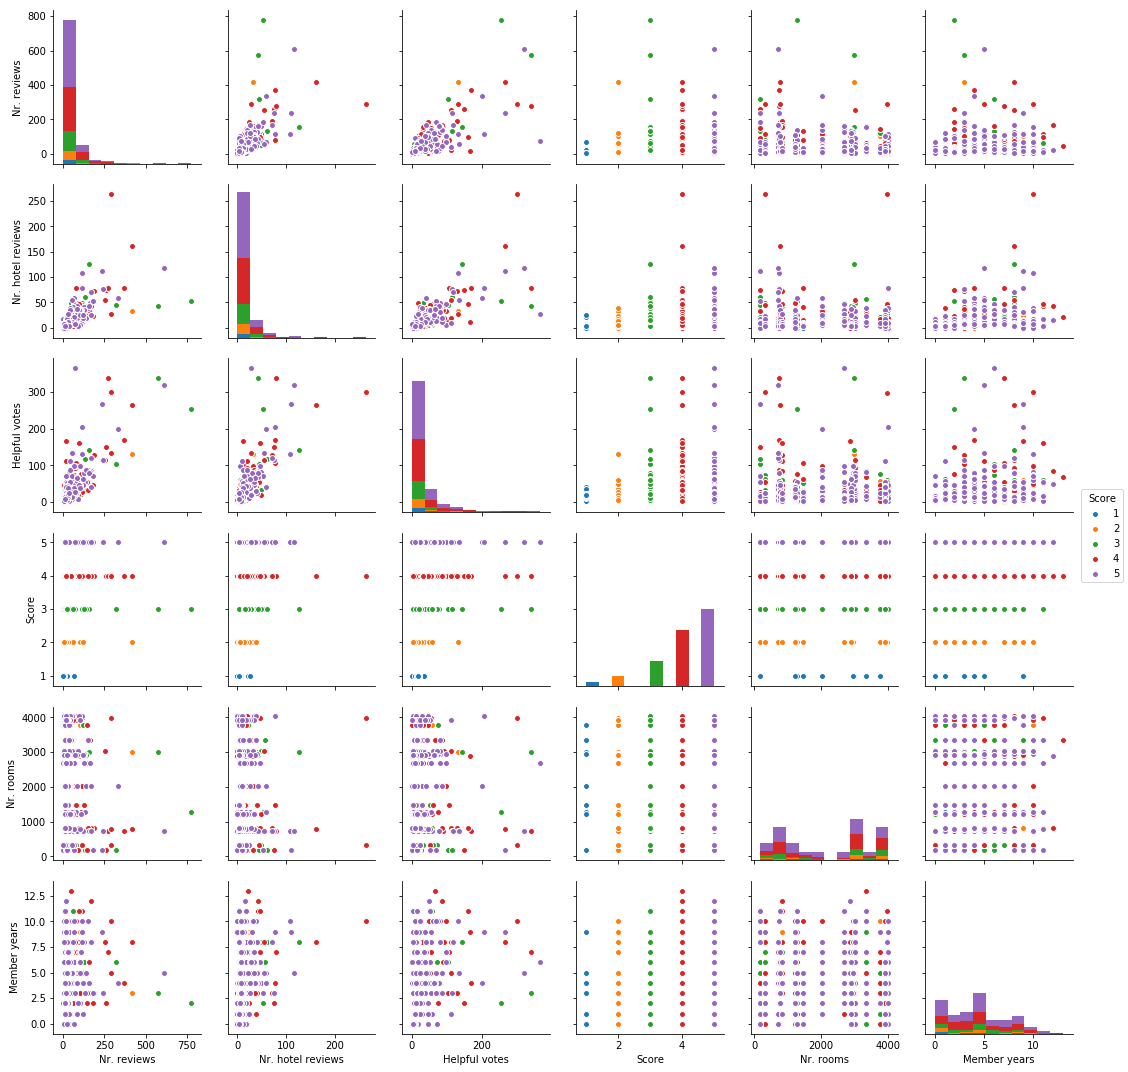

In [29]:
sns.pairplot(df, hue='Score',size=2.5);

In [30]:
y=df.Score
X=df.drop(['Score','Hotel name'],axis=1)

In [31]:
categorical = X.select_dtypes(include=['object'])

In [32]:
cat_values=categorical.columns.values

In [33]:
X['Period of stay'] = X['Period of stay'].map({'Dec-Feb':'Winter', 'Mar-May':'Spring', 'Jun-Aug' :'Summer','Sep-Nov':'Autumn'})

In [34]:
for i in range(len(cat_values)):
    print('For the column "',cat_values[i],'" the unique values are')
    print(df[cat_values[i]].unique())

For the column " User country " the unique values are
['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
For the column " Period of stay " the unique values are
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
For the column " Traveler type " the unique values are
['Friends' 'Business' 'Families' 'Solo' 'Couples']
For the column " Swimming Pool " the unique values are
['NO' 'YES']
For the column " Exercise Room " the unique values are
['YES' 'NO']
For the column " Basketball Court " the unique values are
['NO' 'YES']
For the column " Yoga Classes

In [35]:
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from itertools import product,chain

In [36]:
y=df.Score
X=df.drop('Score',axis=1)
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=0.3, random_state=1234)

In [37]:
categorical.columns

Index(['User country', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel stars', 'User continent', 'Review month',
       'Review weekday'],
      dtype='object')

In [38]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [43]:
model=CatBoostRegressor(depth=3, iterations=250, learning_rate=0.03, l2_leaf_reg= 2,
                         border_count= 25, thread_count=4,loss_function='RMSE',
                         eval_metric='MAE',custom_metric='MAPE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.9854122	test: 4.0297755	best: 4.0297755 (0)	total: 1.25ms	remaining: 312ms
1:	learn: 3.8682425	test: 3.9116108	best: 3.9116108 (1)	total: 8.75ms	remaining: 1.08s
2:	learn: 3.7528508	test: 3.7962192	best: 3.7962192 (2)	total: 10.9ms	remaining: 894ms
3:	learn: 3.6413411	test: 3.6842816	best: 3.6842816 (3)	total: 14.2ms	remaining: 876ms
4:	learn: 3.5350574	test: 3.5769883	best: 3.5769883 (4)	total: 19.6ms	remaining: 961ms
5:	learn: 3.4308031	test: 3.4730189	best: 3.4730189 (5)	total: 25.5ms	remaining: 1.04s
6:	learn: 3.3307152	test: 3.3721087	best: 3.3721087 (6)	total: 30.7ms	remaining: 1.07s
7:	learn: 3.2313583	test: 3.2727518	best: 3.2727518 (7)	total: 32.9ms	remaining: 995ms
8:	learn: 3.1349652	test: 3.1763587	best: 3.1763587 (8)	total: 35.1ms	remaining: 939ms
9:	learn: 3.0442013	test: 3.0852202	best: 3.0852202 (9)	total: 37.8ms	remaining: 908ms
10:	learn: 2.9583989	test: 3.0002884	best: 3.0002884 (10)	total: 43.3ms	remaining: 941ms
11:	learn: 2.8747987	test: 2.9163669	best

116:	learn: 0.7893130	test: 0.7307130	best: 0.7307130 (116)	total: 384ms	remaining: 436ms
117:	learn: 0.7884725	test: 0.7299750	best: 0.7299750 (117)	total: 387ms	remaining: 433ms
118:	learn: 0.7873771	test: 0.7294039	best: 0.7294039 (118)	total: 392ms	remaining: 431ms
119:	learn: 0.7865191	test: 0.7291145	best: 0.7291145 (119)	total: 396ms	remaining: 429ms
120:	learn: 0.7858299	test: 0.7287466	best: 0.7287466 (120)	total: 400ms	remaining: 427ms
121:	learn: 0.7851544	test: 0.7284340	best: 0.7284340 (121)	total: 403ms	remaining: 423ms
122:	learn: 0.7842874	test: 0.7279803	best: 0.7279803 (122)	total: 408ms	remaining: 422ms
123:	learn: 0.7837306	test: 0.7276417	best: 0.7276417 (123)	total: 416ms	remaining: 423ms
124:	learn: 0.7829287	test: 0.7272117	best: 0.7272117 (124)	total: 420ms	remaining: 420ms
125:	learn: 0.7825434	test: 0.7268205	best: 0.7268205 (125)	total: 425ms	remaining: 418ms
126:	learn: 0.7819160	test: 0.7266091	best: 0.7266091 (126)	total: 430ms	remaining: 417ms
127:	learn

225:	learn: 0.7505672	test: 0.7143724	best: 0.7143724 (225)	total: 782ms	remaining: 83.1ms
226:	learn: 0.7497519	test: 0.7149247	best: 0.7143724 (225)	total: 787ms	remaining: 79.8ms
227:	learn: 0.7496225	test: 0.7148316	best: 0.7143724 (225)	total: 795ms	remaining: 76.7ms
228:	learn: 0.7494526	test: 0.7148171	best: 0.7143724 (225)	total: 800ms	remaining: 73.4ms
229:	learn: 0.7490176	test: 0.7149104	best: 0.7143724 (225)	total: 812ms	remaining: 70.6ms
230:	learn: 0.7488530	test: 0.7148873	best: 0.7143724 (225)	total: 815ms	remaining: 67.1ms
231:	learn: 0.7482836	test: 0.7149028	best: 0.7143724 (225)	total: 819ms	remaining: 63.5ms
232:	learn: 0.7481763	test: 0.7149587	best: 0.7143724 (225)	total: 823ms	remaining: 60.1ms
233:	learn: 0.7471759	test: 0.7149149	best: 0.7143724 (225)	total: 827ms	remaining: 56.5ms
234:	learn: 0.7465411	test: 0.7141917	best: 0.7141917 (234)	total: 831ms	remaining: 53ms
235:	learn: 0.7464388	test: 0.7141784	best: 0.7141784 (235)	total: 834ms	remaining: 49.5ms
2